<a href="https://colab.research.google.com/github/SajjitMalla01/worksheet/blob/main/2408645_SajjitMalla_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#from sklearn.feature_selection import SelectKBest, f_regression


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_set = pd.read_csv("/content/drive/MyDrive/datasets_assesment/Quality_of_Life.csv")
data_set.head(15)

,country,Purchasing Power Value,Purchasing Power Category,Safety Value,Safety Category,Health Care Value,Health Care Category,Climate Value,Climate Category,Cost of Living Value,Cost of Living Category,Property Price to Income Value,Property Price to Income Category,Traffic Commute Time Value,Traffic Commute Time Category,Pollution Value,Pollution Category,Quality of Life Value,Quality of Life Category
0,Afghanistan,32.15,'Very Low',25.33,'Low',24.24,'Low',0.00,NaN,21.08,'Very Low',7.8,'Low',56.17,'Very High',84.44,'Very High',0.0,NaN
1,Aland Islands,125.01,'Very High',71.81,'High',79.72,'High',0.00,NaN,53.44,'Low',5.33,'Low',19.05,'Very Low',18.05,'Very Low',0.0,NaN
2,Albania,42.82,'Low',55.52,'Moderate',48.21,'Moderate',86.43,'Very High',40.85,'Low',14.88,'High',36.74,'Moderate',77.25,'High',': 104.16','Low'
3,Alderney,0.00,NaN,83.79,'Very High',100.00,'Very High',0.00,NaN,0.00,NaN,0.0,NaN,5.00,'Very Low',1.72,'Very Low',0.0,NaN
4,Algeria,27.60,'Very Low',47.54,'Moderate',54.43,'Moderate',94.82,'Very High',25.31,'Very Low',21.7,'Very High',45.09,'High',63.87,'High',': 98.83','Very Low'
5,Andorra,121.14,'Very High',84.71,'Very High',75.56,'High',0.00,NaN,48.09,'Low',9.03,'Moderate',13.33,'Very Low',22.98,'Low',0.0,NaN
6,Angola,224.46,'Very High',33.71,'Low',36.58,'Low',0.00,NaN,42.57,'Low',8.01,'Moderate',65.43,'Very High',92.07,'Very High',0.0,NaN
7,Anguilla,0.00,NaN,75.44,'High',77.08,'High',0.00,NaN,0.00,NaN,1.8399999999999999,'Very Low',0.00,NaN,0.00,NaN,0.0,NaN
8,Antigua And Barbuda,0.00,NaN,42.86,'Moderate',30.56,'Low',0.00,NaN,0.00,NaN,0.0,NaN,35.00,'Moderate',43.10,'Moderate',0.0,NaN
9,Argentina,40.36,'Low',36.36,'Low',68.00,'High',98.28,'Very High',32.65,'Very Low',20.05,'Very High',44.07,'High',50.81,'Moderate',': 115.06','Low'


In [ ]:
data_set.isnull().sum()

,0
country,0
Purchasing Power Value,0
Purchasing Power Category,45
Safety Value,0
Safety Category,2
Health Care Value,0
Health Care Category,14
Climate Value,0
Climate Category,112
Cost of Living Value,0


In [ ]:
data_set.describe()

,Purchasing Power Value,Safety Value,Health Care Value,Climate Value,Cost of Living Value,Traffic Commute Time Value,Pollution Value
count,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
mean,54.469467,55.343822,55.055156,39.084133,34.909378,27.940578,54.424889
std,51.341863,16.707732,20.424020,40.960145,22.060664,16.272600,25.486305
min,0.000000,0.000000,0.000000,-3.540000,0.000000,0.000000,0.000000
25%,16.750000,44.240000,46.760000,0.000000,24.380000,16.890000,36.610000
50%,42.230000,54.650000,57.170000,0.000000,35.910000,29.820000,59.680000
75%,83.910000,68.090000,68.430000,80.720000,49.010000,38.860000,73.240000
max,281.830000,100.000000,100.000000,99.890000,83.090000,65.430000,106.900000


In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   country                            225 non-null    object 
 1   Purchasing Power Value             225 non-null    float64
 2   Purchasing Power Category          180 non-null    object 
 3   Safety Value                       225 non-null    float64
 4   Safety Category                    223 non-null    object 
 5   Health Care Value                  225 non-null    float64
 6   Health Care Category               211 non-null    object 
 7   Climate Value                      225 non-null    float64
 8   Climate Category                   113 non-null    object 
 9   Cost of Living Value               225 non-null    float64
 10  Cost of Living Category            181 non-null    object 
 11  Property Price to Income Value     225 non-null    object 

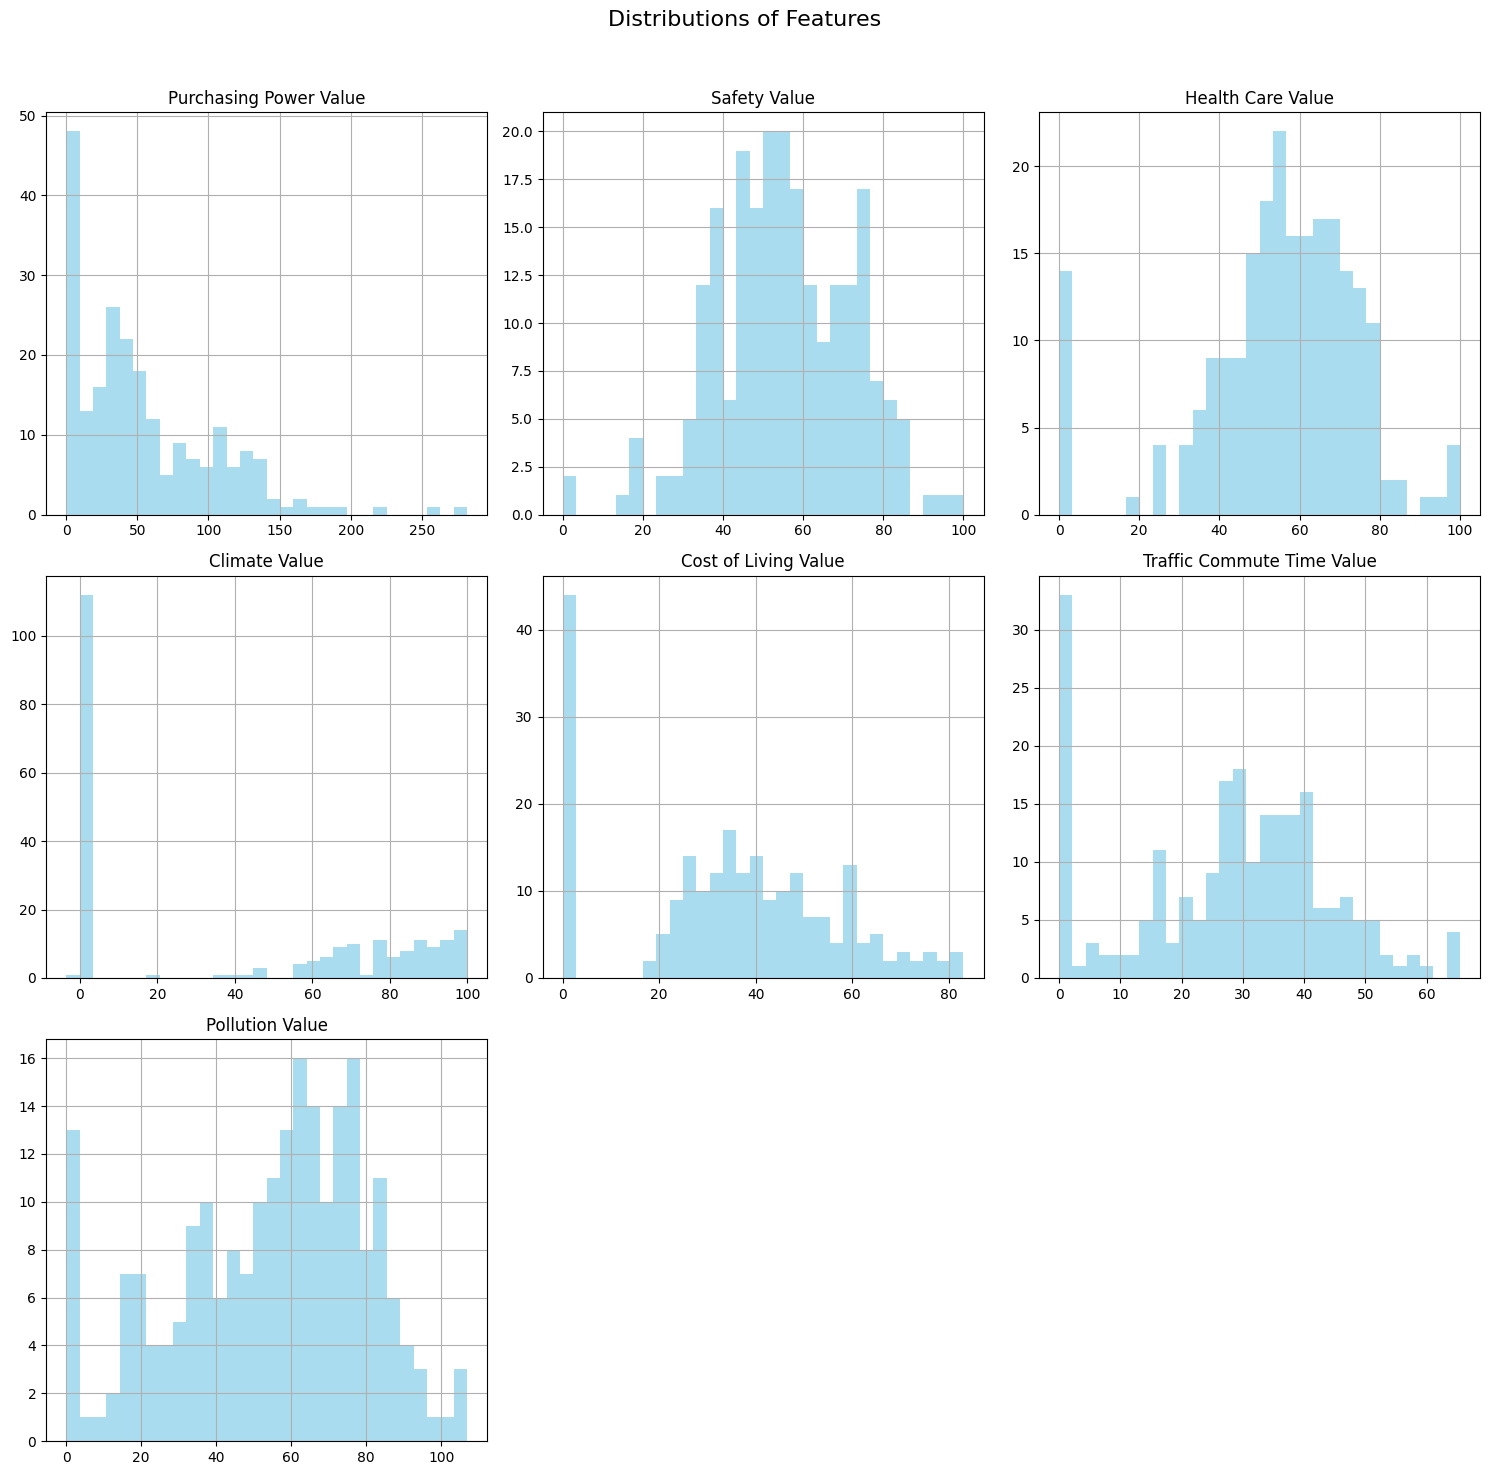

In [ ]:
import math

# Get the number of numerical columns
num_features = data_set.select_dtypes(include=["number"]).shape[1]

# Determine a suitable grid layout
rows = math.ceil(num_features / 3)  # Adjust rows dynamically
cols = min(3, num_features)  # Limit to 3 columns for readability

# Plot histograms
data_set.hist(figsize=(15, 5 * rows), bins=30, color="skyblue", alpha=0.7, layout=(rows, cols))
plt.suptitle("Distributions of Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


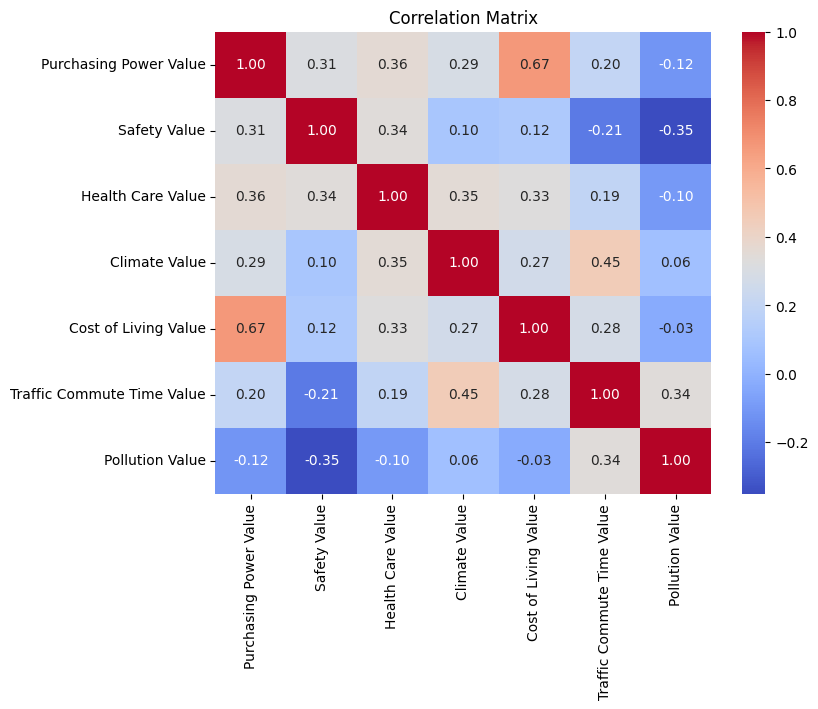

In [ ]:
# Select only numeric columns for correlation
numeric_data = data_set.select_dtypes(include=["number"])

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


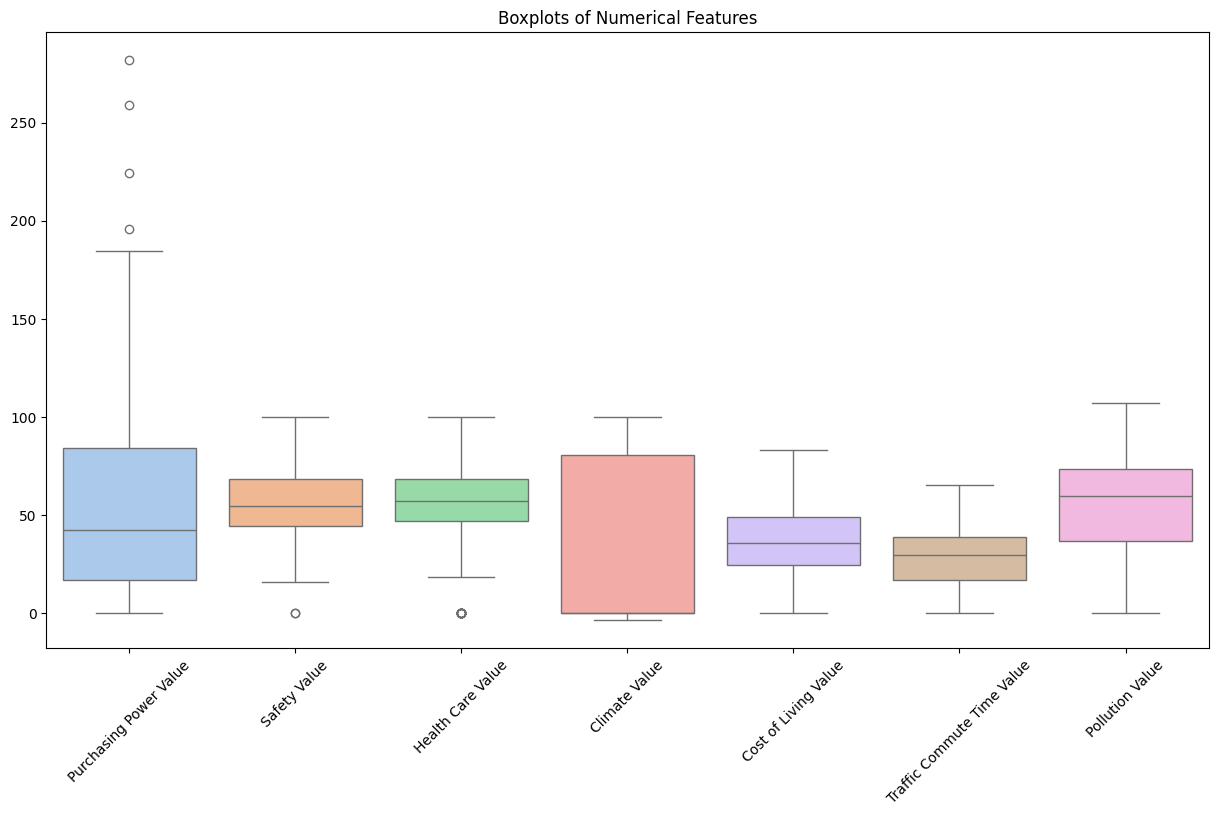

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=data_set, palette="pastel")
plt.title("Boxplots of Numerical Features")
plt.xticks(rotation=45)
plt.show()


Step 1: Splitting the Dataset


In [ ]:

# Load the dataset
file_path = "/content/drive/MyDrive/datasets_assesment/Quality_of_Life.csv"
data_set = pd.read_csv(file_path)

# Strip whitespace and normalize column names
data_set.columns = data_set.columns.str.strip()

# Define features and target
X = data_set.drop(columns=['Quality of Life Value'])  # Drop the target column
Y = data_set['Quality of Life Value']  # Set the target variable

# Display sample data
print("\nFeatures (X) Sample:\n", X.head())
print("\nTarget (Y) Sample:\n", Y.head())




Features (X) Sample:
          country  Purchasing Power Value Purchasing Power Category  \
0    Afghanistan                   32.15                'Very Low'   
1  Aland Islands                  125.01               'Very High'   
2        Albania                   42.82                     'Low'   
3       Alderney                    0.00                       NaN   
4        Algeria                   27.60                'Very Low'   

   Safety Value Safety Category  Health Care Value Health Care Category  \
0         25.33           'Low'              24.24                'Low'   
1         71.81          'High'              79.72               'High'   
2         55.52      'Moderate'              48.21           'Moderate'   
3         83.79     'Very High'             100.00          'Very High'   
4         47.54      'Moderate'              54.43           'Moderate'   

   Climate Value Climate Category  Cost of Living Value  \
0           0.00              NaN             

Step 2: Building a Primary Model


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load dataset
file_path = "/content/drive/MyDrive/datasets_assesment/Quality_of_Life.csv"  # Update path if needed
data = pd.read_csv(file_path)

# Strip whitespace from column names
data.columns = data.columns.str.strip()

# Handle missing values
data.dropna(inplace=True)  # Remove rows with missing values

# Identify target column (Assuming 'Quality of Life Value' is the target)
target_column = "Quality of Life Value"

# Clean target variable (Remove non-numeric characters and convert to float)
data[target_column] = data[target_column].astype(str).str.replace(r"[^\d.]", "", regex=True).astype(float)

# Define features and target
X = data.drop(columns=[target_column])  # Features
Y = data[target_column]  # Target

# Encode categorical features using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize models
linear_model = LinearRegression()
tree_model = DecisionTreeRegressor(random_state=42)

# Train models
linear_model.fit(X_train, Y_train)
tree_model.fit(X_train, Y_train)

# Make predictions
Y_pred_linear = linear_model.predict(X_test)
Y_pred_tree = tree_model.predict(X_test)

# Evaluate models
mse_linear = mean_squared_error(Y_test, Y_pred_linear)
r2_linear = r2_score(Y_test, Y_pred_linear)

mse_tree = mean_squared_error(Y_test, Y_pred_tree)
r2_tree = r2_score(Y_test, Y_pred_tree)

# Print results
print(f"Linear Regression - MSE: {mse_linear:.4f}, R²: {r2_linear:.4f}")
print(f"Decision Tree - MSE: {mse_tree:.4f}, R²: {r2_tree:.4f}")


Linear Regression - MSE: 661.1651, R²: 0.7256
Decision Tree - MSE: 774.0457, R²: 0.6787


Step 3: Building a Model from Scratch (Linear Regression Only)


In [ ]:
import numpy as np

# Feature Scaling (Standardization)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sc_X_train = scaler.fit_transform(X_train)
sc_X_test = scaler.transform(X_test)

# Initialize parameters
def initialize_params(d):
    b = 0  # Bias
    w = np.zeros(d)  # Weights
    return b, w

# Linear function
def linear_function(b, w, X):
    return np.dot(X, w) + b

# Cost function (MSE)
def cost_function(Y_true, Y_pred):
    m = len(Y_true)
    return np.sum((Y_true - Y_pred) ** 2) / (2 * m)

# Gradient descent update
def update_parameters(Y_true, Y_pred, X, b, w, alpha):
    m = len(Y_true)
    dw = -np.dot(X.T, (Y_true - Y_pred)) / m
    db = -np.mean(Y_true - Y_pred)
    w -= alpha * dw
    b -= alpha * db
    return b, w

# Training function
def train_linear_regression(X_train, Y_train, n_iter=5000, alpha=0.01):
    b, w = initialize_params(X_train.shape[1])
    cost_history = []

    for i in range(n_iter):
        Y_hat = linear_function(b, w, X_train)
        cost_now = cost_function(Y_train, Y_hat)
        b, w = update_parameters(Y_train, Y_hat, X_train, b, w, alpha)
        cost_history.append(cost_now)

    return b, w, cost_history

# Train from-scratch model
b, w, cost_history = train_linear_regression(sc_X_train, Y_train, n_iter=5000, alpha=0.01)

# Predictions on test set
Y_test_pred_scratch = linear_function(b, w, sc_X_test)

# Evaluation
test_mse_scratch = mean_squared_error(Y_test, Y_test_pred_scratch)
test_r2_scratch = r2_score(Y_test, Y_test_pred_scratch)

print(f"From Scratch Model - MSE: {test_mse_scratch:.4f}, R²: {test_r2_scratch:.4f}")


From Scratch Model - MSE: 924.7022, R²: 0.6162


Step 4: Hyperparameter Optimization with Cross-Validation

1. Ridge Regression (L2 Regularization) - Hyperparameter Tuning

In [ ]:
# Define parameter grid for Ridge (L2)
param_grid_ridge = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Apply GridSearchCV
ridge_grid = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, Y_train)

# Best hyperparameter
best_ridge_alpha = ridge_grid.best_params_['alpha']
print(f"Best Ridge alpha: {best_ridge_alpha}")

# Train Ridge model with best alpha
ridge_best = Ridge(alpha=best_ridge_alpha)
ridge_best.fit(X_train, Y_train)

# Predict & Evaluate Ridge
ridge_preds = ridge_best.predict(X_test)
ridge_mse = mean_squared_error(Y_test, ridge_preds)
print(f"Ridge Test MSE: {ridge_mse}")


Best Ridge alpha: 10
Ridge Test MSE: 668.5393758308171


2. Decision Tree Regression - Hyperparameter Tuning


In [ ]:
# Define hyperparameter grid for Decision Tree
param_grid_tree = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Apply GridSearchCV
tree_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_tree, cv=5, scoring='neg_mean_squared_error')
tree_grid.fit(X_train, Y_train)

# Best hyperparameters
best_tree_params = tree_grid.best_params_
print(f"best tree parameters: {best_tree_params}")

# Train Decision Tree with best parameters
tree_best = DecisionTreeRegressor(**best_tree_params, random_state=42)
tree_best.fit(X_train, Y_train)

# Predict & Evaluate Decision Tree
tree_preds = tree_best.predict(X_test)
tree_mse = mean_squared_error(Y_test, tree_preds)
print(f"Decision Tree Test MSE: {tree_mse}")


best tree parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Decision Tree Test MSE: 408.30514148449663


Step 6 :  Summary of Best Hyperparameters & Performance


In [ ]:
# Define parameter grid for Lasso (L1)
param_grid_lasso = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Apply GridSearchCV
lasso_grid = GridSearchCV(Lasso(), param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, Y_train)

# Best hyperparameter
best_lasso_alpha = lasso_grid.best_params_['alpha']
print(f"Best Lasso alpha: {best_lasso_alpha}")

# Train Lasso model with best alpha
lasso_best = Lasso(alpha=best_lasso_alpha)
lasso_best.fit(X_train, Y_train)

# Predict & Evaluate Lasso
lasso_preds = lasso_best.predict(X_test)
lasso_mse = mean_squared_error(Y_test, lasso_preds)
print(f"Lasso Test MSE: {lasso_mse}")

Best Lasso alpha: 0.1
Lasso Test MSE: 815.7520920002916


Step7: Feature Selection

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, f_regression

# Initialize the models for RFE
linear_model = LinearRegression()
tree_model = DecisionTreeRegressor(random_state=42)

# Initialize RFE for Linear Regression
rfe_linear = RFE(estimator=linear_model, n_features_to_select=5)
X_train_rfe_linear = rfe_linear.fit_transform(X_train, Y_train)
X_test_rfe_linear = rfe_linear.transform(X_test)

# Initialize RFE for Decision Tree
rfe_tree = RFE(estimator=tree_model, n_features_to_select=5)
X_train_rfe_tree = rfe_tree.fit_transform(X_train, Y_train)
X_test_rfe_tree = rfe_tree.transform(X_test)

# Get rankings of features
linear_ranking = rfe_linear.ranking_
tree_ranking = rfe_tree.ranking_

# Show feature rankings
print("Linear Model Feature Rankings:")
for feature, rank in zip(X.columns, linear_ranking):
    print(f"{feature}: Rank {rank}")

print("\nDecision Tree Feature Rankings:")
for feature, rank in zip(X.columns, tree_ranking):
    print(f"{feature}: Rank {rank}")


Linear Model Feature Rankings:
Purchasing Power Value: Rank 162
Safety Value: Rank 187
Health Care Value: Rank 196
Climate Value: Rank 200
Cost of Living Value: Rank 211
Traffic Commute Time Value: Rank 177
Pollution Value: Rank 168
country_Algeria: Rank 17
country_Argentina: Rank 199
country_Armenia: Rank 45
country_Australia: Rank 213
country_Austria: Rank 57
country_Azerbaijan: Rank 77
country_Bahrain: Rank 132
country_Bangladesh: Rank 149
country_Belarus: Rank 201
country_Belgium: Rank 212
country_Bosnia And Herzegovina: Rank 215
country_Botswana: Rank 214
country_Brazil: Rank 67
country_Bulgaria: Rank 191
country_Cambodia: Rank 51
country_Canada: Rank 138
country_Chile: Rank 184
country_China: Rank 224
country_Colombia: Rank 56
country_Costa Rica: Rank 115
country_Croatia: Rank 178
country_Cyprus: Rank 152
country_Czech Republic: Rank 158
country_Denmark: Rank 23
country_Dominican Republic: Rank 48
country_Ecuador: Rank 219
country_Egypt: Rank 39
country_El Salvador: Rank 41
count

Step8 : Final model

In [ ]:
# Rebuild the Linear Regression model with selected features
final_linear_model = LinearRegression()
final_linear_model.fit(X_train_rfe_linear, Y_train)

# Predict and evaluate
Y_pred_linear_final = final_linear_model.predict(X_test_rfe_linear)
final_mse_linear = mean_squared_error(Y_test, Y_pred_linear_final)
final_r2_linear = r2_score(Y_test, Y_pred_linear_final)

# Rebuild the Decision Tree model with selected features
final_tree_model = DecisionTreeRegressor(**best_tree_params, random_state=42)
final_tree_model.fit(X_train_rfe_tree, Y_train)

# Predict and evaluate
Y_pred_tree_final = final_tree_model.predict(X_test_rfe_tree)
final_mse_tree = mean_squared_error(Y_test, Y_pred_tree_final)
final_r2_tree = r2_score(Y_test, Y_pred_tree_final)

# Print the final evaluation metrics
print("\nFinal Model Evaluation:")
print(f"Linear Regression - MSE: {final_mse_linear:.4f}, R²: {final_r2_linear:.4f}")
print(f"Decision Tree - MSE: {final_mse_tree:.4f}, R²: {final_r2_tree:.4f}")



Final Model Evaluation:
Linear Regression - MSE: 856.7041, R²: 0.6444
Decision Tree - MSE: 309.0327, R²: 0.8717
